In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes_df = pd.read_csv(r"Healthcare-Diabetes.csv")
diabetes_df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_df.shape

(2768, 10)

In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [5]:
diabetes_df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
diabetes_df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes_df  = diabetes_df.drop_duplicates()

In [8]:
diabetes_df.shape

(2768, 10)

In [10]:
diabetes_df = diabetes_df.drop(columns=["Id"])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


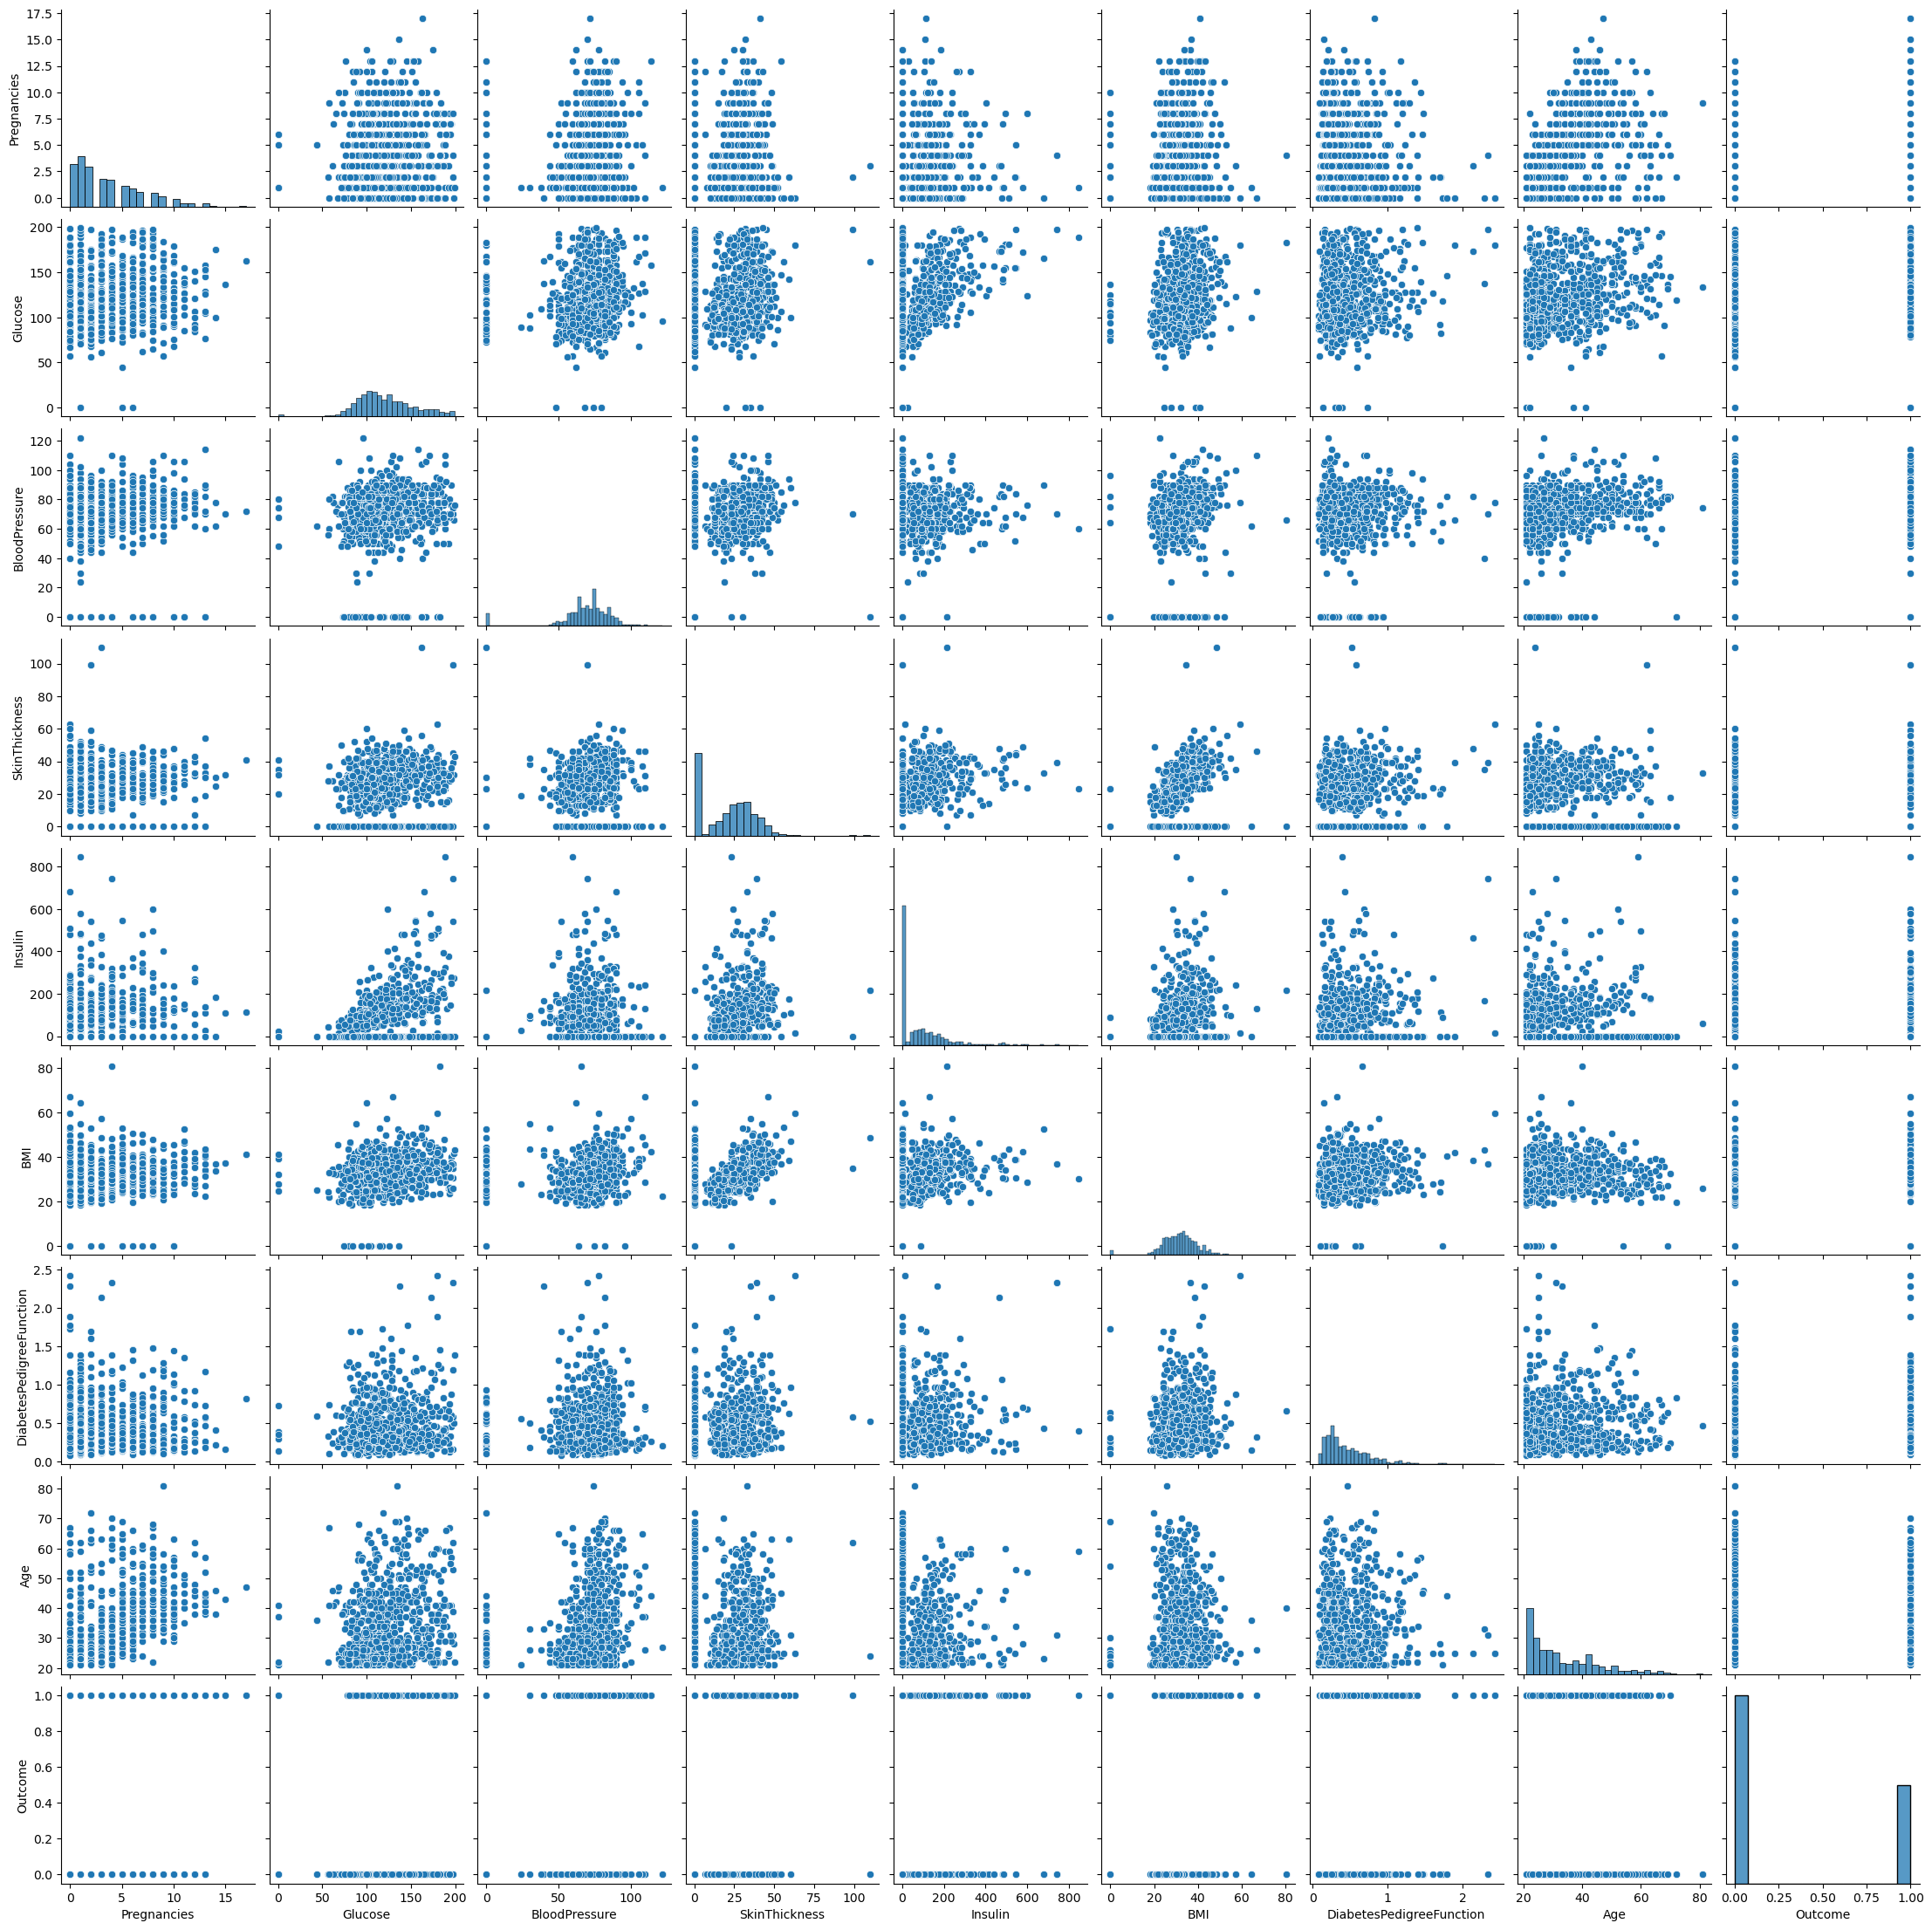

In [11]:
sns.pairplot(diabetes_df)

<Axes: >

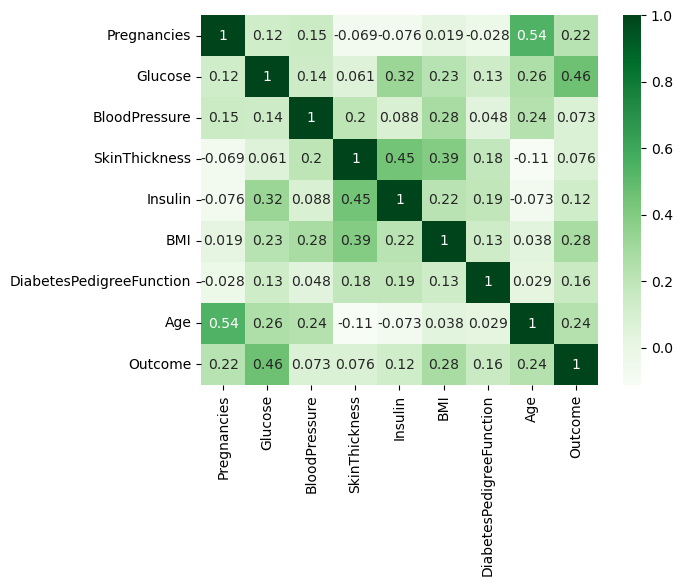

In [12]:
correlation = diabetes_df.corr()
sns.heatmap(correlation, annot=True, cmap="Greens")

In [13]:
Y = diabetes_df["Outcome"]
X = diabetes_df.drop("Outcome",axis=1)

In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [17]:
x_train.shape, y_train.shape

((2214, 8), (2214,))

In [18]:
x_test.shape, y_test.shape

((554, 8), (554,))

In [19]:
from sklearn.ensemble import BaggingClassifier

In [22]:
BC_model = BaggingClassifier(n_estimators=150, random_state=2)
BC_model.fit(x_train,y_train)

BaggingClassifier(n_estimators=150, random_state=2)

In [24]:
y_pred = BC_model.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))
print("confusion matrix : \n",confusion_matrix(y_test,y_pred))

Accuracy :  0.9927797833935018
Precision :  1.0
confusion matrix : 
 [[370   0]
 [  4 180]]


In [25]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test,y_pred)
Accuracy = 1-MAPE
print("Accuracy : ",Accuracy)

Accuracy :  0.9927797833935018


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, activation="relu", input_dim=8))
model.add(Dropout(0.6))
model.add(Dense(40, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(30, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(25, activation="relu"))
model.add(Dense(1, activation="relu"))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5,batch_size=1)





Epoch 1/5


2214/2214 [==============================] - 10s 4ms/step - loss: 5.4728 - accuracy: 0.6445
Epoch 2/5
2214/2214 [==============================] - 7s 3ms/step - loss: 5.3506 - accuracy: 0.6531
Epoch 3/5
2214/2214 [==============================] - 8s 4ms/step - loss: 5.3506 - accuracy: 0.6531
Epoch 4/5
2214/2214 [==============================] - 7s 3ms/step - loss: 5.3506 - accuracy: 0.6531
Epoch 5/5
2214/2214 [==============================] - 8s 4ms/step - loss: 5.3506 - accuracy: 0.6531


In [28]:
ann_y_pred = model.predict(x_test)

18/18 [==============================] - 1s 3ms/step


In [29]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test,ann_y_pred)
Accuracy = 1-MAPE
print("Accuracy : ",Accuracy)

Accuracy :  0.667870036101083


In [30]:
import pickle

with open('Diabetes_model.pkl', 'wb') as f:
    pickle.dump(BC_model,f)